In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf
import keras

print(tf.__version__)
print(sys.version_info)
for module in mpl,np,sklearn,tf,keras:
    print(module.__name__,module.__version__)

Using TensorFlow backend.


2.1.0
sys.version_info(major=3, minor=6, micro=10, releaselevel='final', serial=0)
matplotlib 3.1.3
numpy 1.18.1
sklearn 0.22.1
tensorflow 2.1.0
keras 2.3.1


In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_all,y_train_all),(x_test,y_test) = fashion_mnist.load_data()
x_valid,x_train = x_train_all[:5000],x_train_all[5000:]
y_valid,y_train = y_train_all[:5000],y_train_all[5000:]
print(x_valid.shape,y_valid.shape)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(5000, 28, 28) (5000,)
(55000, 28, 28) (55000,)
(10000, 28, 28) (10000,)


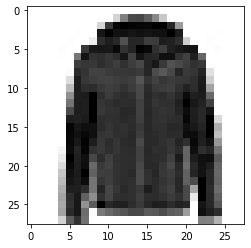

In [4]:
def show_single_image(img_arr):
    plt.imshow(img_arr,cmap="binary")
    plt.show

show_single_image(x_train[0])


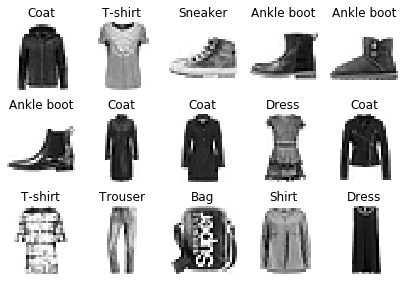

In [5]:
def show_imgs(rows,cols,x_data,y_data,class_names):
    assert len(x_data) == len(y_data)
    plt.figure(figsize=(cols*1.4,rows*1.6))
    for row in range(rows):
        for col in range(cols):
            index = cols*row + col
            plt.subplot(rows,cols,index+1)
            plt.imshow(x_data[index],cmap = "binary",
                       interpolation = 'nearest')
            plt.axis('off')
            plt.title(class_names[y_data[index]])
    plt.show()
    
class_names = ['T-shirt','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

show_imgs(3,5,x_train,y_train,class_names)
            

In [6]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300,activation="relu"))
model.add(keras.layers.Dense(100,activation="relu"))
model.add(keras.layers.Dense(10,activation="softmax"))
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="Sgd",
              metrics=["accuracy"])
model.layers
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_2 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [10]:
history = model.fit(x_train,y_train,epochs=10,validation_data=(x_valid,y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 4s 66us/step - loss: 2.3027 - accuracy: 0.0999 - val_loss: 2.3307 - val_accuracy: 0.1012
Epoch 2/10
55000/55000 [==============================] - 4s 71us/step - loss: 2.3027 - accuracy: 0.0990 - val_loss: 2.3308 - val_accuracy: 0.0914
Epoch 3/10
55000/55000 [==============================] - 3s 61us/step - loss: 2.3027 - accuracy: 0.0977 - val_loss: 2.3307 - val_accuracy: 0.0914
Epoch 4/10
55000/55000 [==============================] - 3s 60us/step - loss: 2.3027 - accuracy: 0.0990 - val_loss: 2.3309 - val_accuracy: 0.0914
Epoch 5/10
55000/55000 [==============================] - 3s 61us/step - loss: 2.3027 - accuracy: 0.0979 - val_loss: 2.3308 - val_accuracy: 0.0914
Epoch 6/10
55000/55000 [==============================] - 4s 64us/step - loss: 2.3027 - accuracy: 0.0970 - val_loss: 2.3308 - val_accuracy: 0.0914
Epoch 7/10
55000/55000 [==============================] - 3s 62us/ste

In [8]:
type(history)
history.history

{'val_loss': [2.3306240161895753,
  2.330727352142334,
  2.330830323791504,
  2.3307987007141113,
  2.330869945526123,
  2.3307125827789306,
  2.3307292823791506,
  2.3309027465820313,
  2.3308588775634766,
  2.330680958557129],
 'val_accuracy': [0.09139999747276306,
  0.10019999742507935,
  0.09139999747276306,
  0.09139999747276306,
  0.09139999747276306,
  0.10119999945163727,
  0.09860000014305115,
  0.09139999747276306,
  0.09139999747276306,
  0.10239999741315842],
 'loss': [9.336390001629458e+30,
  2.302707872390747,
  2.302688952185891,
  2.302697403231534,
  2.302689184778387,
  2.30269284844832,
  2.302691030883789,
  2.3026927915399726,
  2.302697302488847,
  2.302682473338734],
 'accuracy': [0.09963636,
  0.10050909,
  0.10014545,
  0.0984,
  0.09850909,
  0.09952727,
  0.09961818,
  0.099836364,
  0.09845454,
  0.09870909]}

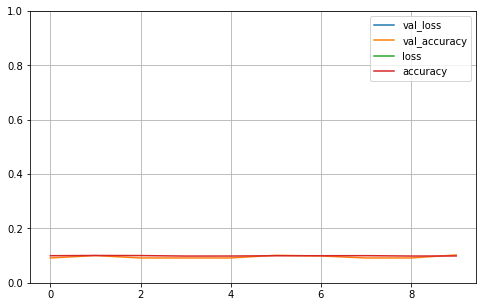

In [9]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.grid(True)
    plt.gca().set_ylim(0,1)
    plt.show()
    
plot_learning_curves(history)
    